# DAT405 Introduction to Data Science and AI 
## 2021-2022, Reading Period 1
## Assignment 4: Spam classification using Naïve Bayes 
There will be an overall grade for this assignment. To get a pass grade (grade 5), you need to pass items 1-3 below. To receive higher grades, finish items 4 and 5 as well. 

The exercise takes place in a notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 7zip (https://www.7-zip.org/download.html) to decompress the data.



In [118]:
%%script false --no-raise-error

#Download and extract data
!mkdir datasets
%cd datasets
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2 
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2 
!tar -xjf 20021010_easy_ham.tar.bz2 
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2
%cd ..

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [119]:
!ls -lah

total 7.6M
drwxr-xr-x 3 islandengineer islandengineer 4.0K Sep 27 21:34 .
drwxr-xr-x 8 islandengineer islandengineer 4.0K Sep 27 21:25 ..
-rw-r--r-- 1 islandengineer islandengineer 204K Sep 27 21:33 DAT405_Assignment4.ipynb
-rw-r--r-- 1 islandengineer islandengineer 337K Sep 22 11:33 DAT405_Assignment4.pdf
-rw-r--r-- 1 islandengineer islandengineer 568K Sep 27 22:54 DAT405_Assignment4_final.ipynb
drwxr-xr-x 5 islandengineer islandengineer 4.0K Sep 27 15:13 datasets
-rw-r--r-- 1 islandengineer islandengineer 6.5M Sep 27 21:33 datasets.7z


### 1. Preprocessing: 
1.	Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher-grade part), you will be asked to filter out the headers and footers. 

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from email import message_from_string
import matplotlib.pyplot as plt
import pandas as pd
import email.policy
import os

In [121]:
def extract_emails(directories, class_name):
  rows = []
  for directory in directories:
    for file in os.listdir(directory):
      with open(os.path.join(directory,file), encoding='latin-1') as f:
        if f is not None:
          content = f.read()
          rows.append({'email': message_from_string(content, policy=email.policy.default), 'content': content, 'class': class_name})
  return pd.DataFrame(rows)

# extract emails and add class information
df_easy_ham = extract_emails(['./datasets/easy_ham'], 'ham')
df_hard_ham = extract_emails(['./datasets/hard_ham'], 'ham')
df_spam = extract_emails(['./datasets/spam'], 'spam')

# join the two dataframes
df_combined = pd.concat([df_easy_ham, df_hard_ham, df_spam])

print('Easy ham:', + len(df_easy_ham))
print('Hard ham:', + len(df_hard_ham))
print('Spam:', + len(df_spam))
df_combined.sample(5)

Easy ham: 2551
Hard ham: 250
Spam: 501


,email,content,class
2455,"[Return-Path, Delivered-To, Received, Received...",From exmh-workers-admin@redhat.com Thu Oct 3...,ham
22,"[Return-Path, Delivery-Date, Return-Path, Rece...",Return-Path: linux-xfs-bounce@oss.sgi.com\nDel...,ham
891,"[Return-Path, Delivered-To, Received, Received...",From martin@srv0.ems.ed.ac.uk Wed Aug 28 10:5...,ham
1142,"[Return-Path, Delivered-To, Received, Received...",From rssfeeds@jmason.org Tue Sep 24 10:47:47 ...,ham
234,"[Return-Path, Delivered-To, Received, Received...",From ilug-admin@linux.ie Wed Sep 25 10:29:22 ...,spam


2.	We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`)

In [122]:
# pre-processing code here
X = df_combined['content']
y = df_combined['class']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# print shapes
print('df_combined:', df_combined.shape)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

df_combined: (3302, 3)
X_train: (2641,)
X_test: (661,)
y_train: (2641,)
y_test: (661,)


### 2. Write a Python program that: 
1.	Uses four datasets (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (e.g. Sklearn) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate. Discuss the differences between these two classifiers. 





True positive multinomial: 0.9963302752293578
True negative multinomial 0.8879310344827587
True positive bernoulli: 0.9963302752293578
True negative bernoulli: 0.4224137931034483


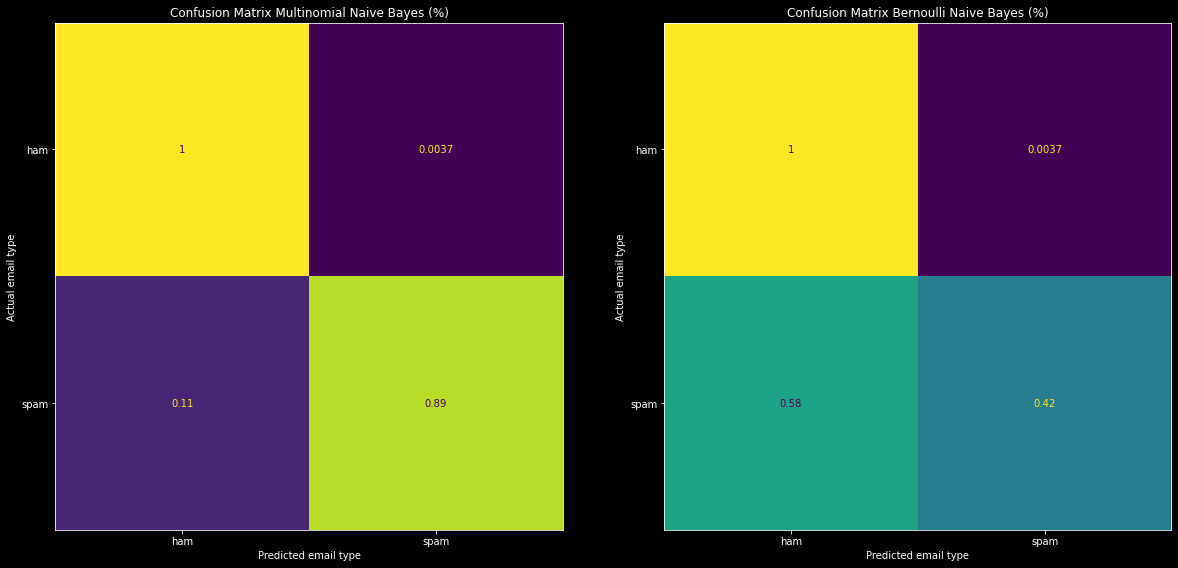

In [123]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def compare_naive_bayes(X_train, X_test, y_train, y_test, cv=None, fit_prior = None):
  # instantiate a Count Vectorizer and fit for training data
  if cv is None:
    cv = CountVectorizer()

  X_train_vector = cv.fit_transform(X_train)
  X_test_vector = cv.transform(X_test)

  # fit models using training vector
  multinomial_naive_bayes = MultinomialNB().fit(X_train_vector, y_train)
  bernoulli_naive_bayes = BernoulliNB().fit(X_train_vector, y_train)

  # make predictions on the test data
  y_pred_multinomial = multinomial_naive_bayes.predict(X_test_vector)
  y_pred_bernoulli = bernoulli_naive_bayes.predict(X_test_vector)
  
  # calculate the true positive and false negatives
  tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_pred_multinomial).ravel()
  tn2, fp2, fn2, tp2 = confusion_matrix(y_test,y_pred_bernoulli).ravel()

  print ("True positive multinomial: " + str(tn1/(fp1+tn1)))
  print ("True negative multinomial " + str(tp1/(fn1+tp1)))
  print ("True positive bernoulli: " + str(tn2/(fp2+tn2)))
  print ("True negative bernoulli: " + str(tp2/(fn2+tp2)))

  # plot confusion matrices
  _, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
  plot_confusion_matrix(multinomial_naive_bayes, X_test_vector, y_test, ax=ax1, colorbar=False, normalize='true')
  ax1.set_title("Confusion Matrix Multinomial Naive Bayes (%)")
  ax1.set_xlabel("Predicted email type")
  ax1.set_ylabel("Actual email type")
  plot_confusion_matrix(bernoulli_naive_bayes, X_test_vector, y_test, ax=ax2, colorbar=False, normalize='true')
  ax2.set_title('Confusion Matrix Bernoulli Naive Bayes (%)')
  ax2.set_xlabel("Predicted email type")
  ax2.set_ylabel("Actual email type")

compare_naive_bayes(X_train, X_test, y_train, y_test)

As the confusion matrices show, the **Multinomial Naive Bayes** model outperforms the **Bernoulli Naive Bayes** model as it suffers from way less misclassifications, and consequently classifies new emails with a higher accuracy. Interestingly enough, both models seem to correctly classify "ham" or non-spam mail with similar accuracy. It's the false negative case, when the model classifies a spam mail as "ham", that separates the two models, with the **Multinomial Naive Bayes** model being more accurate here.

The big difference between **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** is that **Multinomial** takes into account the frequency of the words whilst **Bernoulli** works binary and thus only checks if the word exist or not. This will make **Multinomial** more suited for this task since the a) the dataset is not to large and b) the frequency seems to matter. If the dataset were larger or a different question that is more binary suited then **Bernoulli** be better suited.

### 3.Run your program on 
-	Spam versus easy-ham 


True positive multinomial: 0.9980392156862745
True negative multinomial 0.8514851485148515
True positive bernoulli: 1.0
True negative bernoulli: 0.45544554455445546


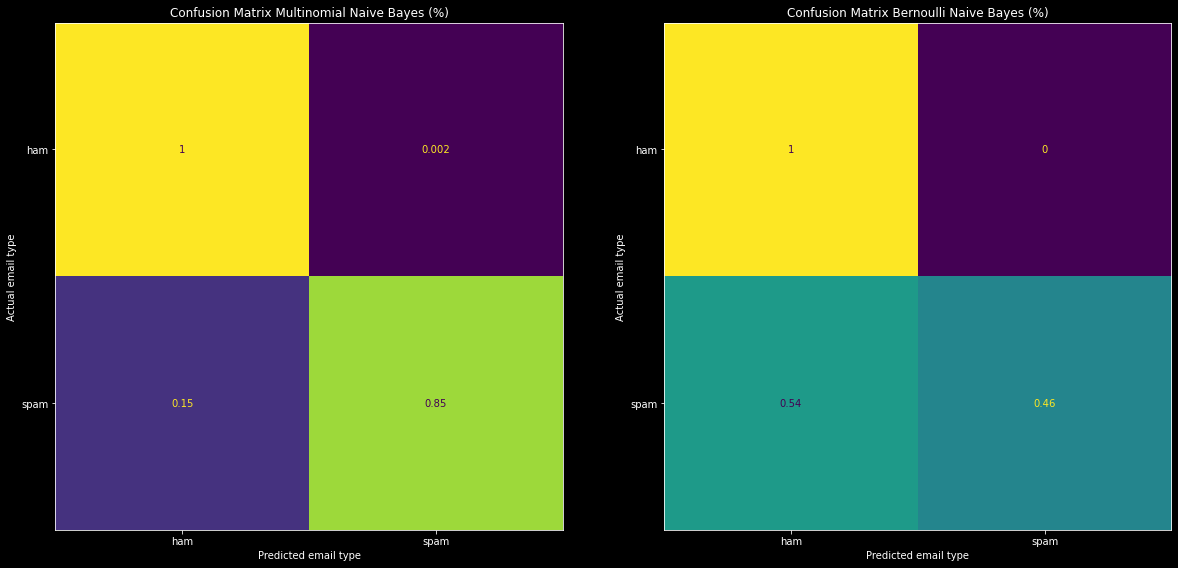

In [124]:
def spam_vs_easy_ham(cv=None, fit_prior = None):
  spam_vs_easy_ham = pd.concat([df_spam, df_easy_ham])
  X = spam_vs_easy_ham['content']
  y = spam_vs_easy_ham['class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
  compare_naive_bayes(X_train, X_test, y_train, y_test, cv=cv)

spam_vs_easy_ham()

-	Spam versus hard-ham.

True positive multinomial: 0.8867924528301887
True negative multinomial 0.9795918367346939
True positive bernoulli: 0.6226415094339622
True negative bernoulli: 0.9897959183673469


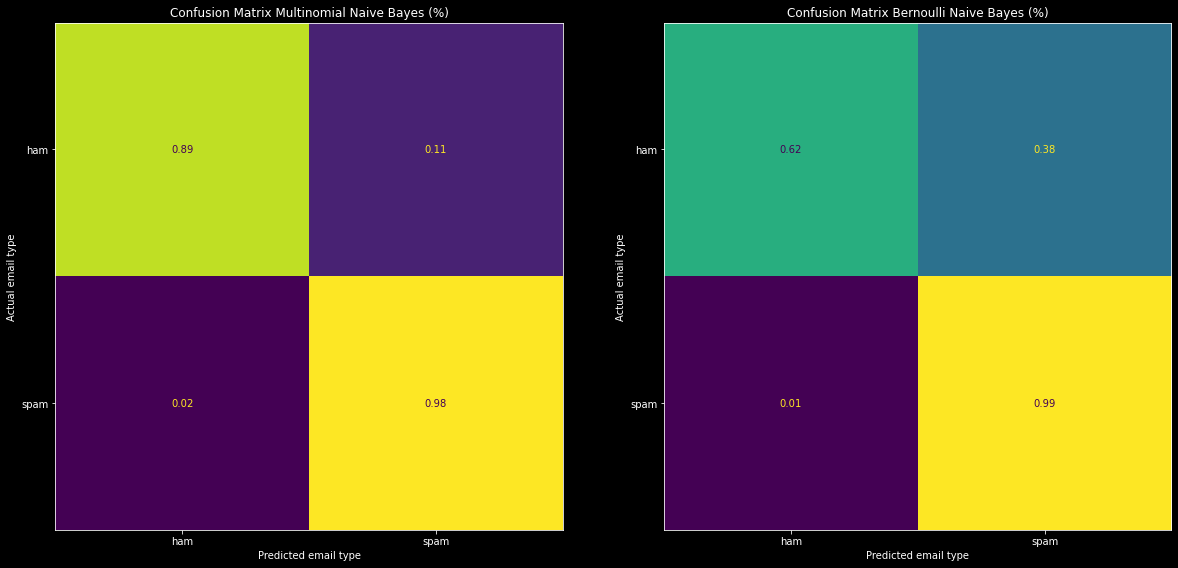

In [125]:
def spam_vs_hard_ham(cv=None, fit_prior = None):
  spam_vs_hard_ham = pd.concat([df_spam, df_hard_ham])
  X = spam_vs_hard_ham['content']
  y = spam_vs_hard_ham['class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
  compare_naive_bayes(X_train, X_test, y_train, y_test, cv=cv)

spam_vs_hard_ham()

### 4.	To avoid classification based on common and uninformative words it is common to filter these out. 

**a.** Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

Discarding common and uninformative words removes what could be considered as noise in the data, which might help improve the accuracy of the two classification models. For instance, looking at the 20 most common words below, one notice that most of these, like `com`, `the`, `to` and `from` are either very uninformative or used in the email headers and thus likely to be irrelevant for deciding if it's spam or ham.


In [126]:
def get_top_n_words(corpus, n=None):
    cv = CountVectorizer().fit(corpus)
    word_vector = cv.transform(corpus)
    word_sums = word_vector.sum(axis=0) 
    words_freq = [(word, word_sums[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda word: word[1], reverse=True)
    return words_freq[:n]

top_common_words = get_top_n_words(df_combined['content'])

top_common_words

[('com', 69898),
 ('the', 40824),
 ('to', 38179),
 ('http', 34048),
 ('from', 28715),
 ('td', 28399),
 ('2002', 28275),
 ('3d', 25415),
 ('for', 23845),
 ('net', 22839),
 ('font', 22609),
 ('with', 22181),
 ('by', 21436),
 ('width', 20932),
 ('of', 20336),
 ('and', 20232),
 ('localhost', 18916),
 ('id', 18226),
 ('received', 17800),
 ('www', 17481),
 ('example', 16310),
 ('list', 15478),
 ('in', 15093),
 ('org', 14914),
 ('11', 14820),
 ('tr', 14766),
 ('br', 13864),
 ('sep', 12483),
 ('fork', 12127),
 ('xent', 11848),
 ('height', 11760),
 ('is', 10929),
 ('src', 10797),
 ('img', 10663),
 ('gif', 10362),
 ('you', 10225),
 ('esmtp', 10189),
 ('09', 10009),
 ('that', 9644),
 ('size', 9466),
 ('10', 9436),
 ('0100', 9361),
 ('it', 9340),
 ('href', 9241),
 ('border', 8801),
 ('subject', 8612),
 ('127', 8340),
 ('table', 7952),
 ('this', 7736),
 ('on', 7568),
 ('sourceforge', 7274),
 ('mailto', 7036),
 ('version', 7005),
 ('face', 6683),
 ('aug', 6668),
 ('admin', 6643),
 ('jm', 6590),
 ('b

**b.** Use the parameters in Sklearn’s `CountVectorizer` to filter out these words. Update the program from point 3 and run it on your data and report your results.

You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you. Argue for your decision-making.

**Using a custom word filter**

Here one needs to specify the number of words to filter out, in order of word frequency.

filtered out words: ['com', 'the', 'to', 'http', 'from', 'td', '2002', '3d', 'for', 'net', 'font', 'with', 'by', 'width', 'of', 'and', 'localhost', 'id', 'received', 'www']
True positive multinomial: 1.0
True negative multinomial 0.9207920792079208
True positive bernoulli: 1.0
True negative bernoulli: 0.45544554455445546


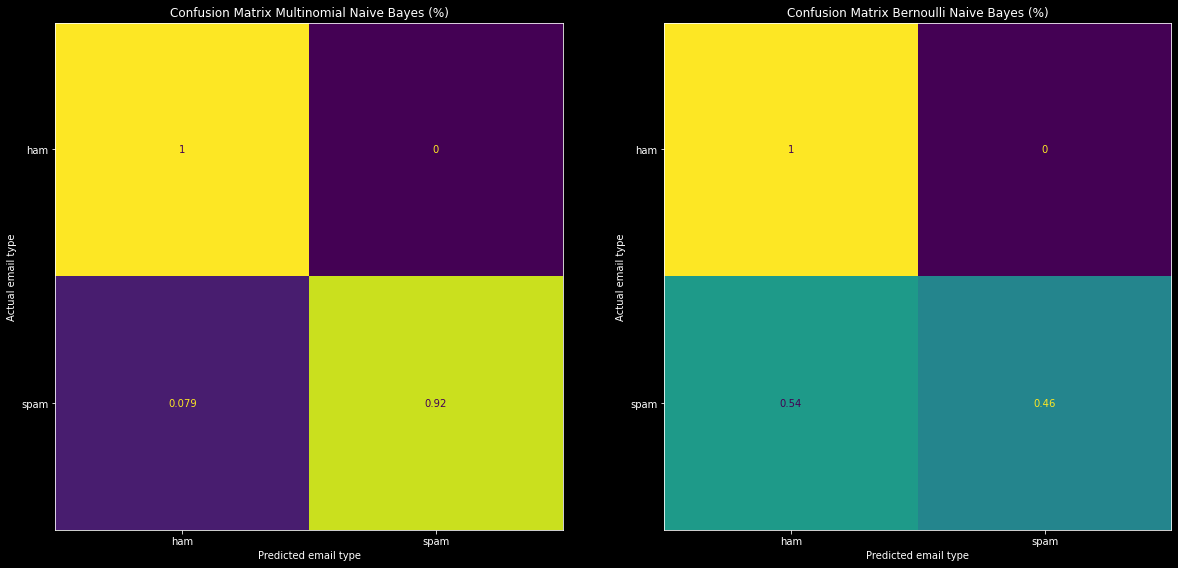

In [127]:
custom_stop_words = [word[0] for word in top_common_words[:20]]
print(f'filtered out words: {custom_stop_words}')

# generate word count vectorizer with custom in filter
cv_custom_filter = CountVectorizer(stop_words=custom_stop_words)

spam_vs_easy_ham(cv=cv_custom_filter)

Comparing it with `spam vs hard ham` dataset

True positive multinomial: 0.9433962264150944
True negative multinomial 0.9795918367346939
True positive bernoulli: 0.6226415094339622
True negative bernoulli: 0.9897959183673469


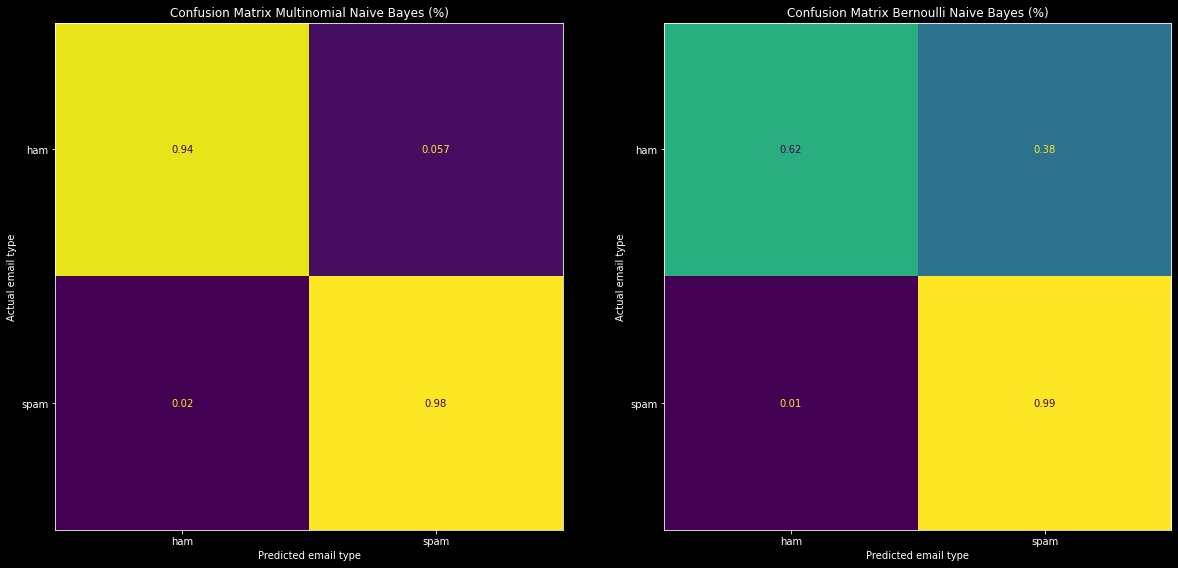

In [128]:
spam_vs_hard_ham(cv=cv_custom_filter)

**Using SKlearn's built in filtering**


True positive multinomial: 0.9980392156862745
True negative multinomial 0.900990099009901
True positive bernoulli: 1.0
True negative bernoulli: 0.45544554455445546


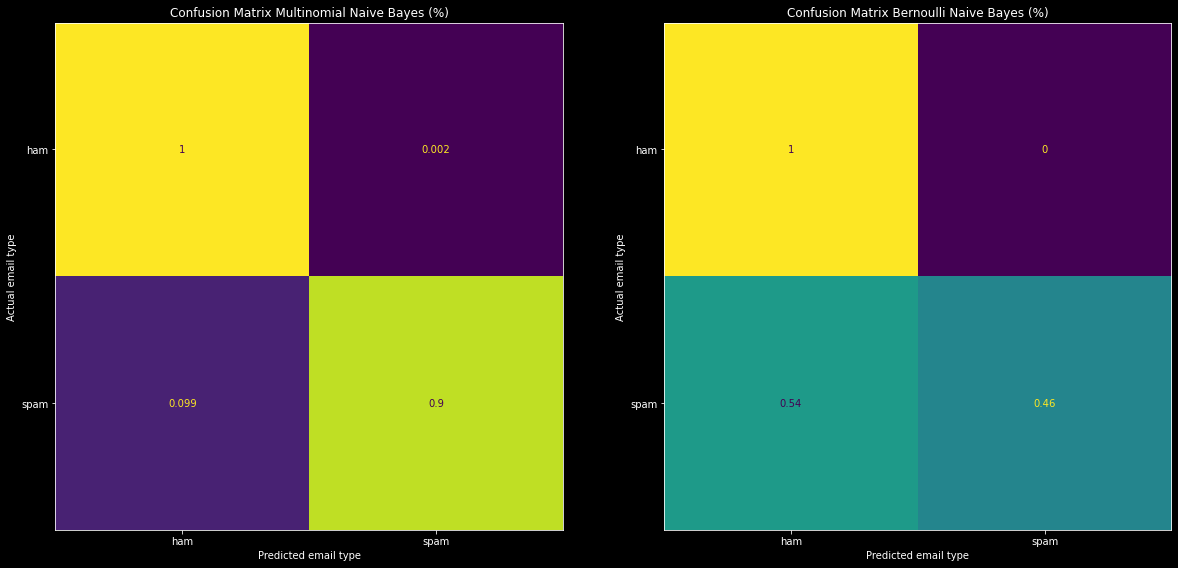

In [129]:
# generate word count vectorizer configured with built in filter
cv_built_in_filter = CountVectorizer(max_df=0.9, stop_words='english')

spam_vs_easy_ham(cv=cv_built_in_filter)

Comparing it with `spam vs hard ham` dataset

True positive multinomial: 0.9245283018867925
True negative multinomial 0.9693877551020408
True positive bernoulli: 0.6037735849056604
True negative bernoulli: 1.0


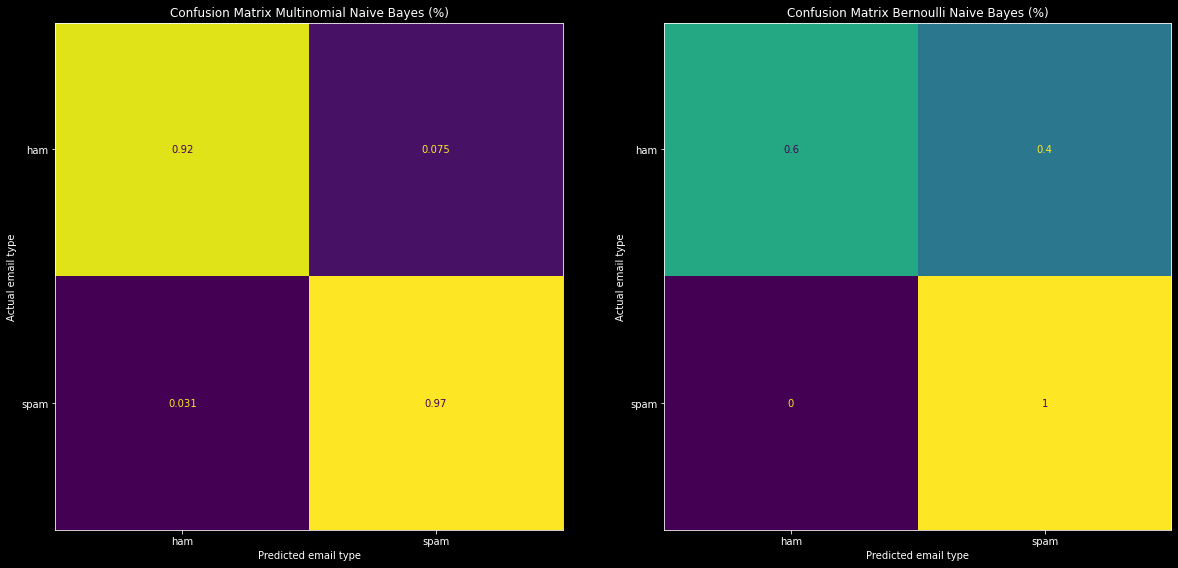

In [130]:
spam_vs_hard_ham(cv=cv_built_in_filter)

As mentioned in the question, one can either let `sklearn` filter out common words using  the built-in stop word list for English, or one can manually specify this list. In the documentation, the authors of the `sklern` library mention there are several known issues with using the built in stop word list and that one should consider an alternative. A reason to manually specify the stop words is that this allows for experimenting with different configuration which might fit the particular dataset a lot better. On the other hand this might also increase the risk of overfitting the models with the consequence of poor accuracy when presented with new emails.

We decided to go with the built in method since it's been developed and tested over many years by more experienced engineers, as well as to avoid overfitting (The results suggested that our custom words performed slightly better then the built in method)

### 5. Eeking out further performance
Filter out the headers and footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 


In [134]:
def extract_payload(email):
  if email.is_multipart():
    for part in email.get_payload():
      return part.get_payload()
  else:
    return email.get_payload()

df_combined['payload'] = df_combined.email.map(extract_payload)

for email_payload in df_combined.payload.head(3):
  print(email_payload)

http://spineless.org/~mod/pix/octoberMoon.jpg
-- 
#ken	P-)}

Ken Coar, Sanagendamgagwedweinini  http://Golux.Com/coar/
Author, developer, opinionist      http://Apache-Server.Com/

"Millennium hand and shrimp!"



On Wed, Oct 02, 2002 at 10:45:04PM +0200, Matthias Saou wrote:
> > So I've attached a patch to specify an alternate kernel by setting the
> > "TARGET_KERNEL" environment variable before running rpmbuild. You
> > still need to have the rpm for the specified kernel installed, but at
> > least it doesn't have to be currently running. It's kinda hackish, so
> > if someone has a better way to do this, let me know.
> 
> That idea looks good although it maybe needs to be tweaked a bit more (what
> you sent doesn't support packages named "kernel-smp"). I'd also prefer a
> cleaner way than the env variable, and preferrably not editing the spec...
> probably "--define 'target 2.4.xx-xx' --with smp". Sound good enough?
> The BuildRequires on "kernel-source" will also need to be removed 

-	Does the result improve from 3 and 4? 

As can be seen in the output above, we managed to remove the headers and footers from the emails. However we ran into type errors while generating the word vector using the CountVectorizer, even though `type(df['payload'])` reported the same types. Unfortunately we could not solve this issue within reasonable time. However, unless the type of mail that was sent (html or normal), or any other header attribute is an indicator of spam or ham we would guess that the results would not improve. On the other hand, removing the header / footer, assuming these provide no insight on whether it's spam or ham, this might help unclutter the dataset, which in turn might improve the accuracy.

- The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies? 
- What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages? 

If for example the ratio between ham and spam is 70% versus 30% in the total sample set and the ratio in the training set is 90%/10% and the test set is 50%/50% (this is to illustrate a point and not to discusses whether this is feasible) then they are not properly represented in each set. This will mean that training set will encounter more hams then possible and will be better at detecting them whilst worst at detecting spams. Furthermore is the fit_prior is set to True then it would guess that more emails are ham than it is (more discussion concerning this further down). Although this example is extreme, small changes occurring by chance could will also skew the results. The remedy for this would be utilizing some form of cross-validation on the data set since it would eliminated the random occurring missrepresented training/test sets. 

Another thing that could lead to skewed results is the sample distribution of ham and spam. If the ham is higher then spam then it will be better at detecting it then spam. This problem will appear when/if the data gets validated, since it will still perform good on the test data. A remedy for this would probably be to balance out the sample size with the stratify parameter or ensure that the sample size is also representable of the reality (that ham appear more then spam). The second point is maybe not so good although we will not dive into it here since that would be a larger question to answer.

Lastly if the data has not been filtered so that common words are removed this could for example make it think that common words are more frequent amongst the ham. The remedy would for example be to remove the common words before training and testing.

Re-estimate your classifier using `fit_prior` parameter set to `false`, and answer the following questions:
- What does this parameter mean?
- How does this alter the predictions? Discuss why or why not.

The `fit_prior` argument considers the classes prior probabilities if set to TRUE. Otherwise, it uses assumes uniformity. This is what was explained on the lecture about farmers and librarians. If for example there is a larger number of farmers than librarians the odds of a shy and introverted farmer get picks is higher since the percentage of farmers in the sample is higher, even if the percentage amongst librarians who has this personality trait is higher. 

In this case the amount of ham is higher than spam. If prior is set to true, there will a higher chance of predicting ham then spam. From the perspective of being set to true and then switching to false this will result in a higher probability of predicting spam then before. This could result in a lower number of false positives. However it could also lead to a higher number of false negatives.

In our case interestingly enough the data does not change which could indicate that the other factors are good enough indicators that the classes probability according to size does not matter much in this case.

Note: We tested using fit_prior to false but in the code changed it back afterwards

### What to report and how to hand in.

- You will need to clearly report all results in the notebook in a clear and appropriate way, either using plots or code output (f.x. "print statements"). 
- The notebook must be reproducible, that means, we must be able to use the `Run all` function from the `Runtime` menu and reproduce all your results. **Please check this before handing in.** 
- Save the notebook and share a link to the notebook (Press share in upper left corner, and use `Get link` option. **Please make sure to allow all with the link to open and edit.**
- Edits made after submission deadline will be ignored, graders will recover the last saved version before deadline from the revisions history.
- **Please make sure all cells are executed and all the output is clearly readable/visible to anybody opening the notebook.**